In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Linear Regression
 - Load the data.csv dataset using pandas
 - Extract data fromYearsExperience column is a variable named X 
 - Extract data from salary column is a variable named Y 
 - Divide the dataset into two parts for training and testing in 66% and 33% proportion 
 - Create and train LinearRegression Model on training set 
 - Make predictions based on the testing set using the trained model 7. Check the performance by calculating the r2 score of the model 

In [15]:
lin_data = pd.read_csv('data.csv')
lin_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
lin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
lin_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

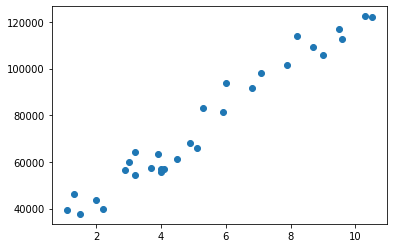

In [24]:
plt.scatter(lin_data['YearsExperience'],lin_data['Salary'])
plt.show()

In [25]:
lin_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [18]:
X = lin_data['YearsExperience']
Y = lin_data['Salary']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=30)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

In [22]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_predict = lin_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error,r2_score

print('MSE  : ',mean_squared_error(y_test,lin_predict))
print('MAE  : ',mean_absolute_error(y_test,lin_predict))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,lin_predict)))
print('MAPE : ',mean_absolute_percentage_error(y_test,lin_predict))
print('R2_sc: ',r2_score(y_test,lin_predict))

MSE  :  24084587.09024281
MAE  :  4027.466742668944
RMSE :  4907.605025900394
MAPE :  0.06699730255430214
R2_sc:  0.9732329013678512


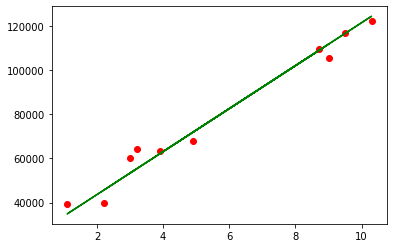

In [34]:
plt.scatter(X_test,y_test,c='r')
plt.plot(X_test,lin_predict,c='g')
plt.show()

# Logistic Regression

- Load the diabetes dataset using pandas   
- Extract data fromOutcome column is a variable named Y   
- Extract data from every column except Outcome column in a variable named X   
- Divide the dataset into two parts for training and testing in 70% and 30% proportion   
- Create and train Logistic Regression Model on training set   
- Make predictions based on the testing set using the trained model   
- Check the performance by calculating the confusion matrix and accuracy score of the model 

In [50]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
X = diabetes.drop(['Outcome'],axis = 1)
Y = diabetes['Outcome']
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=30)

In [53]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
log_predict = logistic_model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_test,log_predict)

array([[143,  16],
       [ 30,  42]], dtype=int64)

In [55]:
accuracy_score(y_test,log_predict)

0.8008658008658008

In [57]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       159
           1       0.72      0.58      0.65        72

    accuracy                           0.80       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231



# Naïve-Bayes
- Load the diabetes dataset using pandas  
- Extract data fromOutcome column is a variable named Y  
- Extract data from every column except Outcome column in a variable named X  
- Divide the dataset into two parts for training and testing in 70% and 30% proportion  
- Create and train Naïve Bayes Model on training set  
- Make predictions based on the testing set using the trained model  
- Check the performance by calculating the confusion matrix and accuracy score of the model   


In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
naive_predict = gnb.predict(X_test)

In [61]:
confusion_matrix(y_test,naive_predict)

array([[133,  26],
       [ 28,  44]], dtype=int64)

In [69]:
accuracy_score(y_test,naive_predict)

0.7662337662337663

In [73]:
print(classification_report(y_test,naive_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       159
           1       0.63      0.61      0.62        72

    accuracy                           0.77       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.76      0.77      0.77       231



# Decision Tree
- Load the dataset using pandas  
- Extract data fromOutcome column is a variable named Y  
- Extract data from every column except Outcome column in a variable named X  
- Divide the dataset into two parts for training and testing in 70% and 30% proportion  
- Create and train Decision Tree Model on training set 
- Make predictions based on the testing set using the trained model  
- Check the performance by calculating the confusion matrix and accuracy score of the model   


In [75]:
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train,y_train)
dec_predict = dec_model.predict(X_test)

In [76]:
confusion_matrix(y_test,dec_predict)

array([[123,  36],
       [ 25,  47]], dtype=int64)

In [77]:
accuracy_score(y_test,dec_predict)

0.7359307359307359

In [78]:
print(classification_report(y_test,dec_predict))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       159
           1       0.57      0.65      0.61        72

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.75      0.74      0.74       231



# Random Forest
- Load the dataset using pandas  
- Extract data fromOutcome column is a variable named Y  
- Extract data from every column except Outcome column in a variable named X.  
- Divide the dataset into two parts for training and testing in 70% and 30% proportion  
- Create and train Random Forest Model on training set  
- Make predictions based on the testing set using the trained model  
- Check the performance by calculating the confusion matrix and accuracy score of the model 

In [95]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(250)
forest_model.fit(X_train,y_train)
forest_predict = forest_model.predict(X_test)

In [96]:
confusion_matrix(y_test,forest_predict)

array([[137,  22],
       [ 27,  45]], dtype=int64)

In [97]:
accuracy_score(y_test,forest_predict)

0.7878787878787878

In [98]:
print(classification_report(y_test,forest_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       159
           1       0.67      0.62      0.65        72

    accuracy                           0.79       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.78      0.79      0.79       231

